In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

IMG_PATH = '/workspace/sae-transfer-learning/imgs/'
EVAL_PATH = '/workspace/sae-transfer-learning/eval/'

### Baseline

In [17]:
baseline = pd.read_csv(EVAL_PATH + "rs-post_all.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0


In [18]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0,0,0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0,0,1
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0,0,2
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0,0,3
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0,11,7
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0,11,8
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0,11,9
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0,11,10


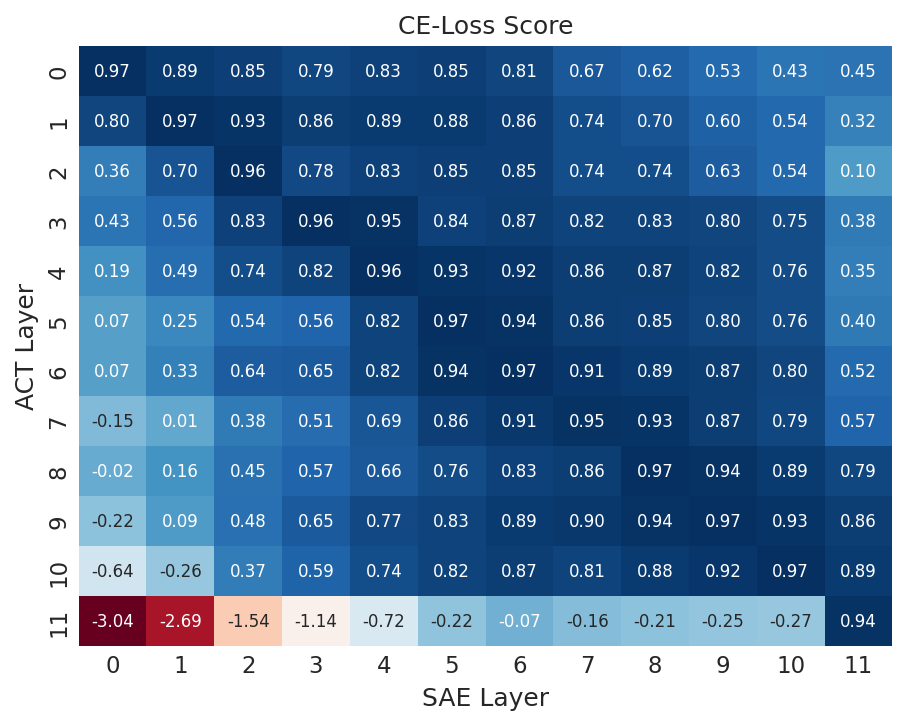

In [19]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_ce_loss_score.png")
plt.show()

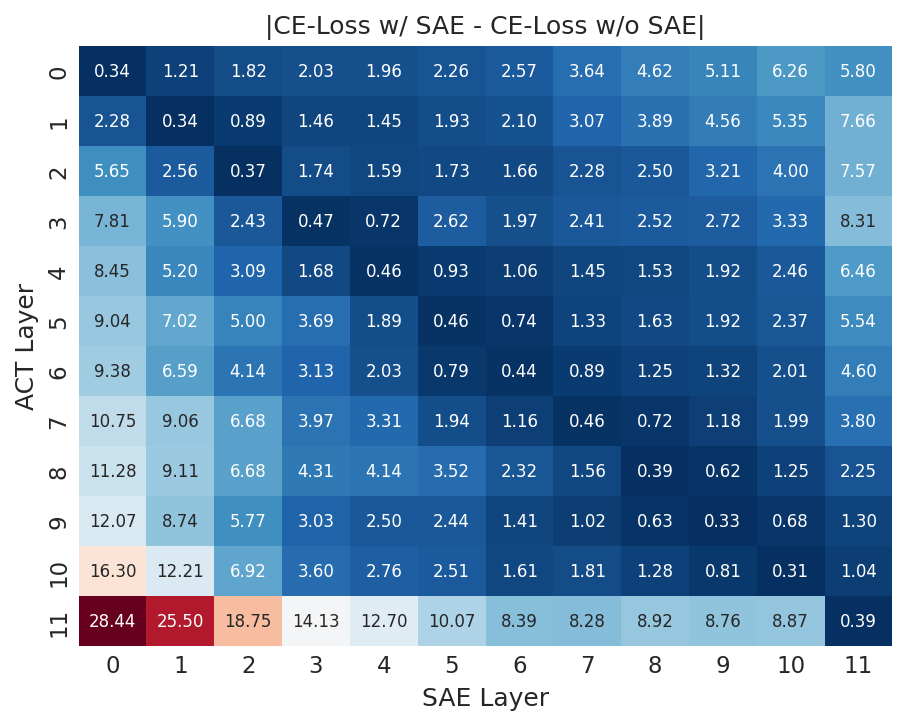

In [22]:
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    np.abs(baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12) - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_ce_loss_diff.png")
plt.show()

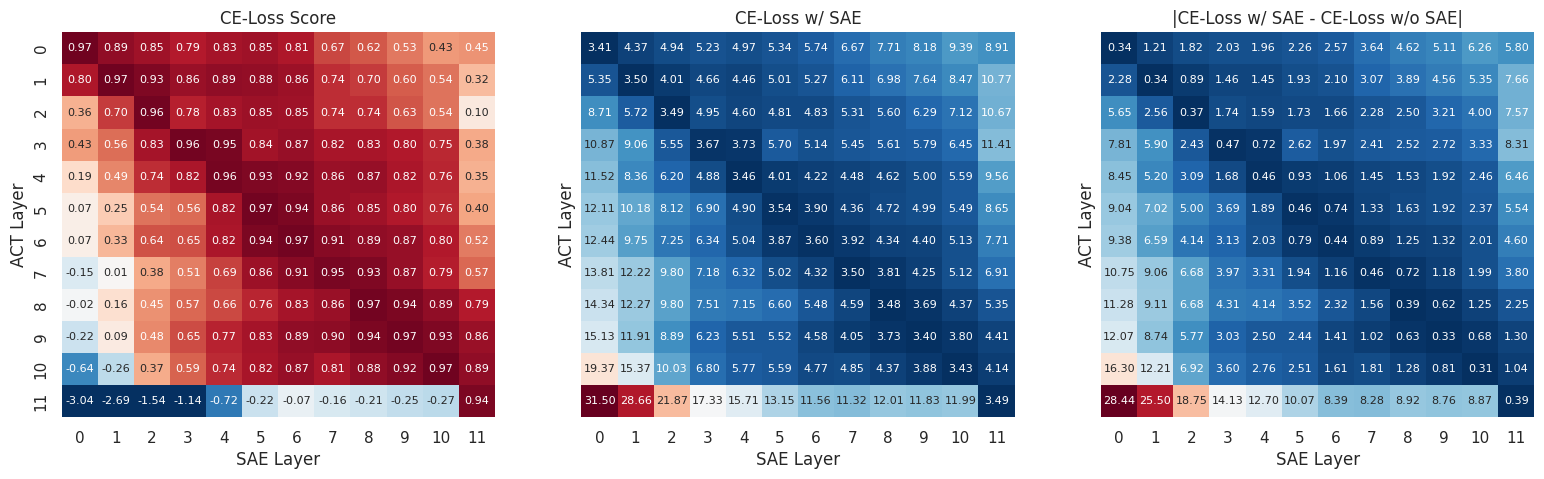

In [25]:
sns.set_theme()

# define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True, sharex=True)

ax=sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
    ax=axes[0],
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
    ax=axes[1],
)
ax.set_title("CE-Loss w/ SAE")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    np.abs(
        baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)
        - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    ax=axes[2],
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
fig.show()

### Forward

In [76]:
mapping = {
    '1': '100003840',
    '2': '200003584',
    '3': '300003328',
    '4': '400003072',
    'final': 'final_500002816'
}

ckpt = mapping['2']

In [77]:
fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_forward_{ckpt}_all.csv")
fwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
fwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated
0,0-0,NaN,NaN,4.036596,3.065878,14.046822,NaN,0.911600,8.892148,10.765379,1.201526,29.727539,14.613957,262144.0
1,1-0,NaN,NaN,3.475028,3.065878,14.779825,NaN,0.965072,11.600180,10.026603,0.863597,16.774902,12.345913,262144.0
2,2-0,NaN,NaN,6.076419,3.065878,11.822902,NaN,0.656214,13.056845,8.053393,0.612965,13.665894,8.768148,262144.0
3,3-0,NaN,NaN,10.663414,3.065878,16.673855,NaN,0.441685,14.201983,6.739366,0.472953,20.712158,9.519516,262144.0
4,4-0,NaN,NaN,8.708842,3.065878,13.445559,NaN,0.456345,14.809937,6.412178,0.432568,28.294556,11.631481,262144.0


In [78]:
fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) + 1
fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
fwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,4.036596,3.065878,14.046822,NaN,0.911600,8.892148,10.765379,1.201526,29.727539,14.613957,262144.0,0,1
12,0-1,NaN,NaN,4.617496,3.065878,14.046822,NaN,0.858699,8.892148,13.258459,1.466487,76.753784,25.392643,262144.0,0,2
24,0-2,NaN,NaN,5.022902,3.065878,14.046822,NaN,0.821780,8.892148,13.882873,1.534944,163.602417,40.565750,262144.0,0,3
36,0-3,NaN,NaN,5.180907,3.065878,14.046822,NaN,0.807391,8.892148,14.625084,1.613970,255.217407,56.485153,262144.0,0,4
48,0-4,NaN,NaN,5.619986,3.065878,14.046822,NaN,0.767405,8.892148,20.917530,2.323019,475.585693,100.615051,262144.0,0,5


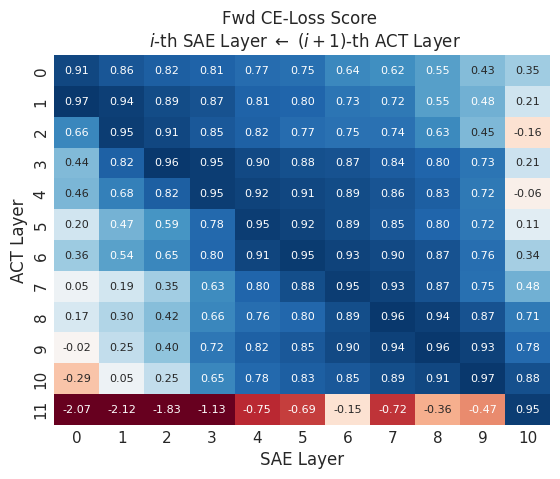

In [79]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i+1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
fig.show()

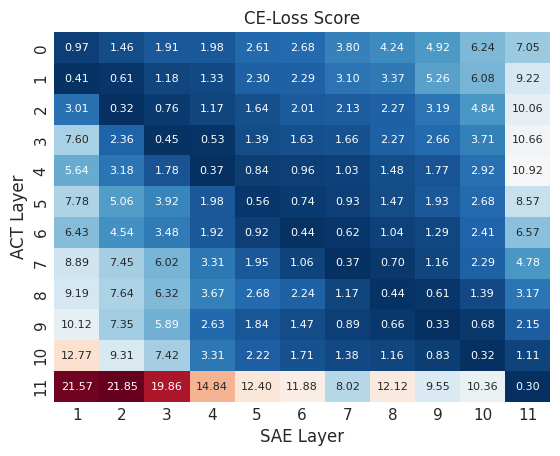

In [80]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    np.abs(
        fwd[["ce_loss_with_sae"]].to_numpy().reshape(12, 11)
        - baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)[:, :-1]
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
fig.show()

### Backward

In [81]:
bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all.csv")
bwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
bwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated
0,0-1,NaN,NaN,3.417440,3.065878,14.046822,NaN,0.967984,8.892148,7.753177,0.876544,16.474487,9.642144,262144.0
1,1-1,NaN,NaN,4.883171,3.065878,14.779825,NaN,0.844861,11.600180,7.933694,0.688665,14.690430,9.788431,262144.0
2,2-1,NaN,NaN,7.594506,3.065878,11.822902,NaN,0.482858,13.056845,6.692047,0.514525,13.141357,7.071581,262144.0
3,3-1,NaN,NaN,11.400465,3.065878,16.673855,NaN,0.387522,14.201983,5.902398,0.415382,28.600098,10.966290,262144.0
4,4-1,NaN,NaN,9.866785,3.065878,13.445559,NaN,0.344786,14.809937,6.034115,0.409174,40.746704,15.090844,262144.0


In [82]:
bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int)
bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
bwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-1,NaN,NaN,3.417440,3.065878,14.046822,NaN,0.967984,8.892148,7.753177,0.876544,16.474487,9.642144,262144.0,0,1
12,0-2,NaN,NaN,4.264661,3.065878,14.046822,NaN,0.890831,8.892148,10.665033,1.188032,50.159912,16.507786,262144.0,0,2
24,0-3,NaN,NaN,4.947530,3.065878,14.046822,NaN,0.828644,8.892148,12.143427,1.327155,100.669800,25.390331,262144.0,0,3
36,0-4,NaN,NaN,5.077662,3.065878,14.046822,NaN,0.816793,8.892148,12.607257,1.388118,188.707642,41.043541,262144.0,0,4
48,0-5,NaN,NaN,5.217002,3.065878,14.046822,NaN,0.804104,8.892148,13.719124,1.518417,321.965088,63.996525,262144.0,0,5


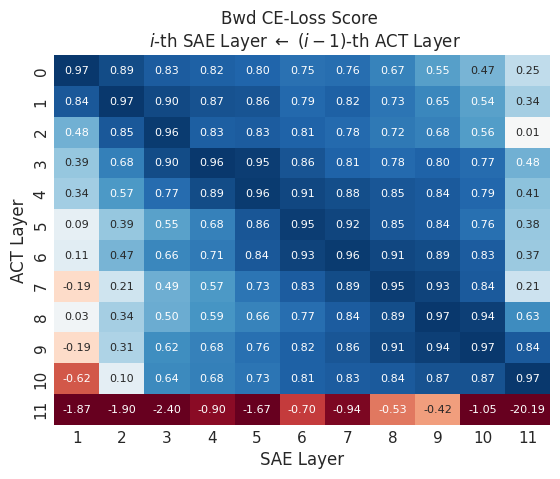

In [83]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i-1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
fig.show()

In [84]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1

### Baseline - fwd/bwd CE-Loss

In [85]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] - 1 == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_{i-1}$"}),
        fwd[(fwd["ACT-Layer"] == fwd["SAE-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_{i-1}$"}),
    ],
    axis=1,
)
df

,Baseline SAE$_i$ on ACT$_i$,Fwd-SAE$_i$ on ACT$_i$,Baseline SAE$_i$ on ACT$_{i-1}$,Fwd-SAE$_i$ on ACT$_{i-1}$
0,0.970317,0.911600,0.887747,0.965072
1,0.961339,0.940273,0.930840,0.952843
2,0.963667,0.907242,0.777337,0.963121
3,0.960696,0.951181,0.949862,0.951222
4,0.966709,0.924682,0.934969,0.948500
5,0.966613,0.922397,0.941604,0.954833
6,0.951533,0.928296,0.913071,0.950195
7,0.968072,0.928408,0.932931,0.963434
8,0.966408,0.942260,0.944009,0.963972
9,0.968863,0.930672,0.931585,0.967033


/tmp/ipykernel_53996/40158566.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")


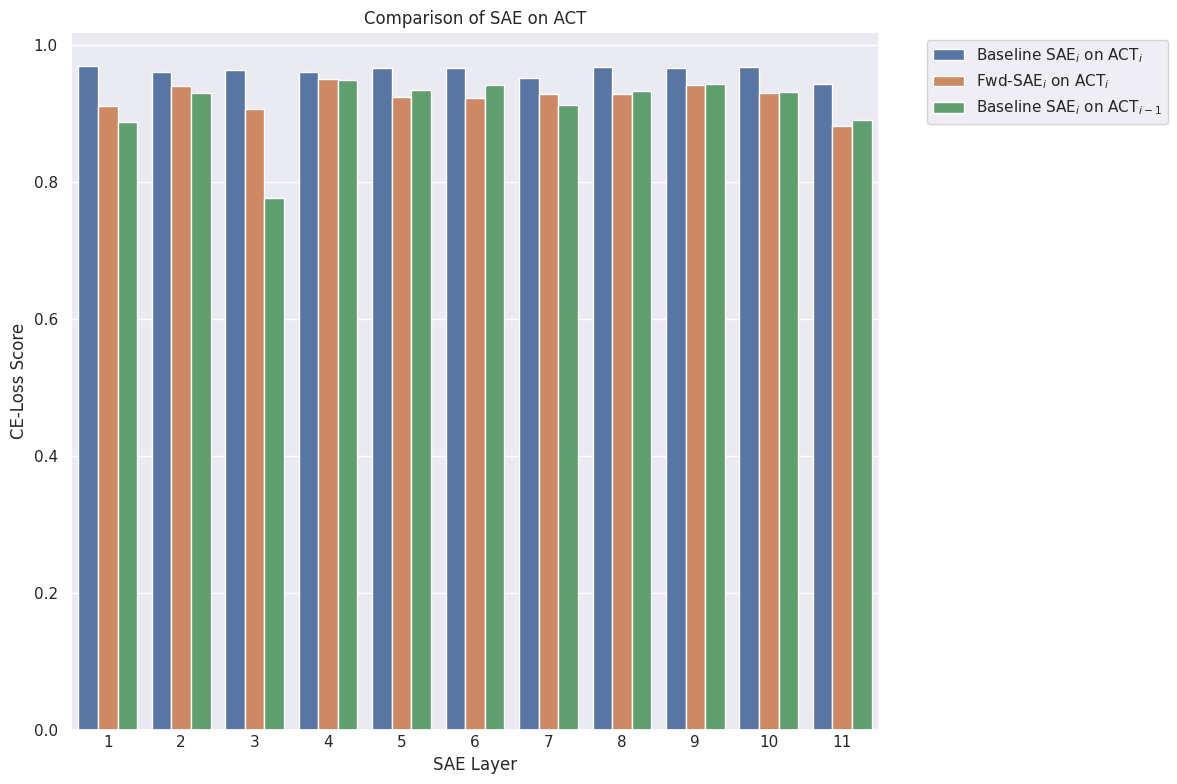

In [86]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] - 1 == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_{i-1}$"}),
        # fwd[(fwd["ACT-Layer"] == fwd["SAE-Layer"])]
        # .reset_index(drop=True)[["ce_loss_score"]]
        # .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_{i-1}$"}),
    ],
    axis=1,
)

# Reset index to use for plotting
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")

plt.title("Comparison of SAE on ACT")
plt.xlabel("SAE Layer")
plt.ylabel("CE-Loss Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipykernel_53996/1547641881.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")


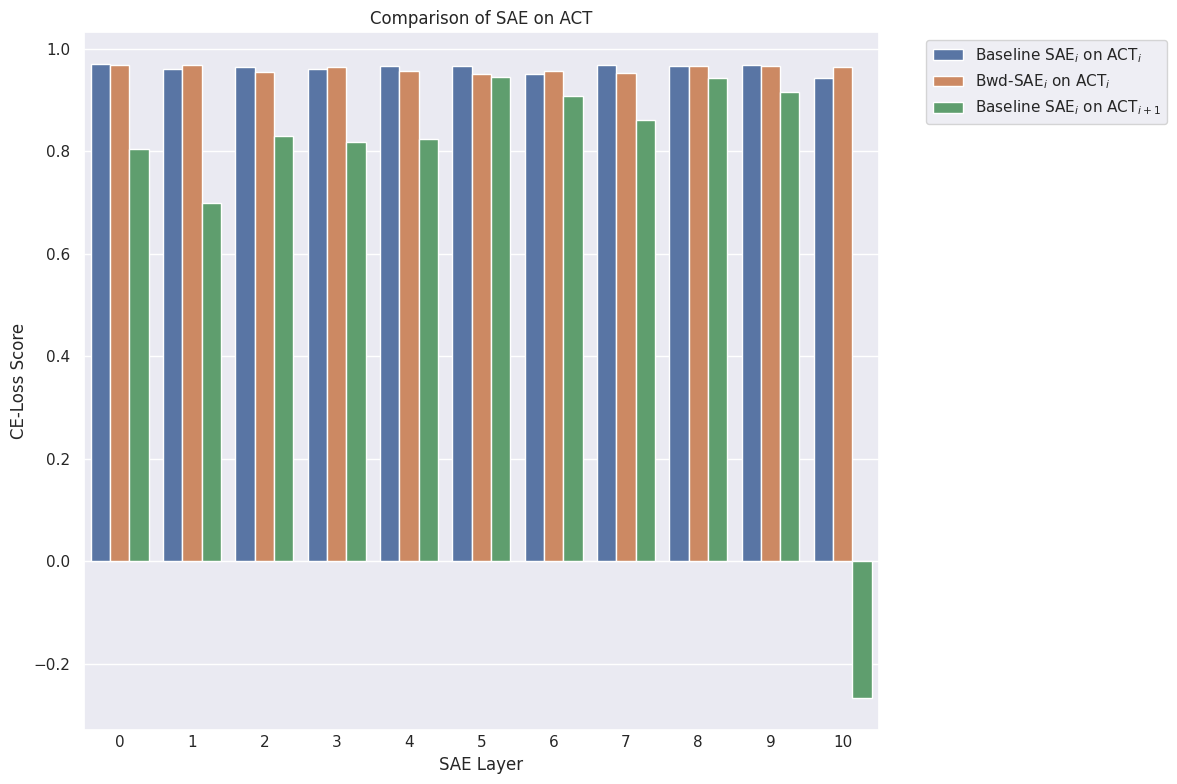

In [87]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        bwd[(bwd["SAE-Layer"] - 1 == bwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Bwd-SAE$_i$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] + 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_{i+1}$"}),
        # bwd[(bwd["ACT-Layer"] == bwd["SAE-Layer"])]
        # .reset_index(drop=True)[["ce_loss_score"]]
        # .rename(columns={"ce_loss_score": "Bwd-SAE$_i$ on ACT$_{i-1}$"}),
    ],
    axis=1,
)

# Reset index to use for plotting
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")

plt.title("Comparison of SAE on ACT")
plt.xlabel("SAE Layer")
plt.ylabel("CE-Loss Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Distances

In [3]:
import torch
from sae_lens import ActivationsStore, HookedSAETransformer
from sae_lens.config import LanguageModelSAERunnerConfig
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
cfg = LanguageModelSAERunnerConfig(
    # Data Generating Function (Model + Training Distibuion)
    model_name="pythia-160m-deduped",
    hook_name=None,
    hook_layer=None,
    dataset_path="NeelNanda/pile-small-tokenized-2b",
    is_dataset_tokenized=True,
    context_size=1024,
    streaming=True,
    # SAE Parameters
    architecture="jumprelu",
    d_in=768,
    d_sae=None,
    b_dec_init_method="zeros",
    expansion_factor=8,
    activation_fn="relu",  # relu, tanh-relu, topk
    normalize_sae_decoder=True,
    from_pretrained_path=None,
    apply_b_dec_to_input=False,
    # Activation Store Parameters
    n_batches_in_buffer=128,
    # Misc
    device=device,
    seed=42,
    dtype="float32",
    prepend_bos=False,
)

model = HookedSAETransformer.from_pretrained("pythia-160m-deduped").to(device)
activation_store = ActivationsStore.from_config(model, cfg)

/workspace/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Run name: 6144-L1-0.001-LR-0.0003-Tokens-2.000e+06
n_tokens_per_buffer (millions): 4.194304
Lower bound: n_contexts_per_buffer (millions): 0.004096
Total training steps: 488
Total wandb updates: 48
n_tokens_per_feature_sampling_window (millions): 8388.608
n_tokens_per_dead_feature_window (millions): 4194.304
We will reset the sparsity calculation 0 times.
Number tokens in sparsity calculation window: 8.19e+06


/workspace/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model pythia-160m-deduped into HookedTransformer
Moving model to device:  cuda


In [8]:
n_batches = 8
batch_size = 8

activations = []

for _ in tqdm(range(n_batches)):
    batch_tokens = activation_store.get_batch_tokens(batch_size)
    with torch.no_grad():
        _, cache = model.run_with_cache(batch_tokens)

    activations.append(cache.stack_activation('resid_post').cpu())
    del cache

activations = torch.cat(activations, dim=1).reshape(model.cfg.n_layers, -1, model.cfg.d_model) # [L, N, D]

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:02<00:00,  3.03it/s]


In [9]:
activations.shape

torch.Size([12, 65536, 768])

In [10]:
# Compute the dot product between pairs of layers along dimension N
dot_products = torch.einsum('ijk,mjk->jim', activations, activations) # [N, L, L]

# Compute the norms of each layer vector
norms = torch.norm(activations, dim=-1)  # [L, N]

# Compute normalized dot products
normalized_dot_products = dot_products / torch.einsum('ik,jk->kij', norms, norms)  # [N, L, L]

# Ensure numerical stability by clamping the values in the range [-1, 1]
normalized_dot_products = torch.clamp(normalized_dot_products, -1.0, 1.0)

# Compute angular distances (arccos of the normalized dot products)
angular_distances = torch.acos(normalized_dot_products) / torch.pi * 2

# Average over dimension N
average_angular_distances = angular_distances.mean(dim=0)

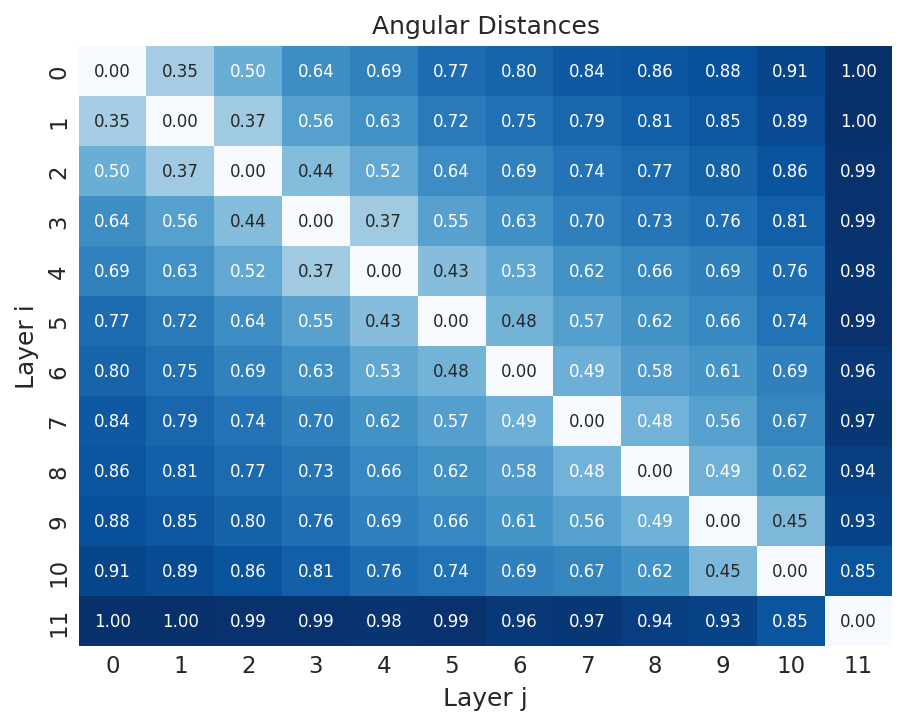

In [13]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    average_angular_distances.cpu().numpy(),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("Angular Distances")
ax.set_ylabel("Layer i")
ax.set_xlabel("Layer j")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_angular_distances.png")
plt.show()

In [3]:
cache

ActivationCache with keys ['hook_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_rot_q', 'blocks.0.attn.hook_rot_k', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_rot_q', 'blocks.1.attn.hook_rot_k', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normalized', 'blocks.1.mlp.hook_pre', 'blocks.1.mlp.hook_post', 'blocks.1.hook_mlp_out', 'bloc